This builds on TESQ-ml-ns-nogo-go

> **proposal 1**
> 
> Two class (e.g., CorrectStop vs. CorrectGo)
> 
> Leave-One-Out classifier...
> 
> Neural similarity of a subject to the group with a Stop vs. Go contrast might actually be indicative of performance.
> 
> subjects will naturally differ across the task as to how much their average signal responds to that, and the ones with better response might have better response inhibition.

We use the same neural data, but instead of regressing on classifying these classes, we take one class or the other or we combine them in some way and we regress on our self report variables.

So there are a couple of steps here...

1. iterate through subjects, holding out one at a time, and do the following steps.
2. Train a regressor across all the training subjects, regressing CorrectStop and CorrectGo on TESQ-E and other self report measures including FFQ either (a) independently (b) contrasted with each other (c) concatenated in a single image.
3. If a link can be established, we've shown there is a relevant link between TESQ-E or other self-report measure, and the neural signature.
4. ...that seems like a publication in itself!




As a first pass, we can simplify this a bit just trying that single classifier on all subjects. This means that we're using train for tes tset but it will give us an initial measure of feasibility.

We probably do need to restrict to a specific brain region though, and that means retraining. - I think that prefrontal cortex mask we have works well.

## Data already generated

Can we use data already generated in `SST_inhibition_cv.ipynb`?

In [1]:
import pickle
from IPython.core.display import display, HTML, Markdown

In [2]:
ml_data_folderpath = "/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml"

In [3]:
#results_filepath=ml_data_folderpath + "/SST/train_test_results_conditions_40subs_twoclasses.pkl"

In [4]:
#results_2c = pickle.load(open(results_filepath,'rb'))

In [5]:
from nilearn import plotting
from nilearn.masking import compute_brain_mask
import nltools as nlt

#plotting.view_img(results_2c[3]['CorrectGo'],threshold=0.0002)

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [6]:
#plotting.plot_glass_brain(results_2c[3]['CorrectGo'])

In [7]:
#plotting.view_img(results_2c[3]['CorrectStop'],cmap='blue_red')

In [8]:
background_img = nlt.Brain_Data('/projects/sanlab/shared/spm12/canonical/MNI152_T1_1mm_brain.nii').to_nifti()

/home/bsmith16/.conda/envs/neuralsignature/lib/python3.8/site-packages/nilearn/image/resampling.py:531: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


Not quite--we need a PFC mask I think. But we can use the script already written to do that.

## Setup

In [9]:
import sys
import os
import pandas as pd

sys.path.append(os.path.abspath("../../ml/"))

from apply_loocv_and_save import *
from dev_wtp_io_utils import *
import gc
import nibabel as nib

from os import path



python initialized for apply_loocv_and_save
cpus available; cpus to use:
28 25
28


In [10]:
from analyze_results import *

## condition_contrast

In [11]:
#load the matrix associated with this file
sl_mat = scipy.io.loadmat(
'/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/fx/models/SST/wave1/conditions/sub-DEV073/SPM.mat',
simplify_cells=True            
)
mat_betas = sl_mat['SPM']['Vbeta']

In [12]:
[mat_betas[beta_i]['descrip'] for beta_i in range(len(mat_betas))]

['spm_spm:beta (0001) - Sn(1) CorrectGo*bf(1)',
 'spm_spm:beta (0002) - Sn(1) CorrectStop*bf(1)',
 'spm_spm:beta (0003) - Sn(1) FailedStop*bf(1)',
 'spm_spm:beta (0004) - Sn(1) Cue*bf(1)',
 'spm_spm:beta (0005) - Sn(1) R1',
 'spm_spm:beta (0006) - Sn(1) R2',
 'spm_spm:beta (0007) - Sn(1) R3',
 'spm_spm:beta (0008) - Sn(1) R4',
 'spm_spm:beta (0009) - Sn(1) R5',
 'spm_spm:beta (0010) - Sn(1) constant']

## stitching contrasts together in different ways

We'd want:

 - contrast of the two conditions
 - each of the two conditions alone.
 
The contrast is a little tricky. Easiest thing is to try each of the conditions alone. Stitching the two together might not be too hard. Let's try doing CorrectStop first, and then we'll try concatenating the images. Doing a contrast is actually the most difficult becuase I have to backtrack in the process to generate new betas (see https://docs.google.com/presentation/d/1K-nFrZYE6rR8t0myNyacB7frBzV3B1--nMqPhVkwL8E/edit#slide=id.geeff6890fb_0_16).

See `different ways of combining images.ipynb`.

## template

## regressing on self report

In [13]:
nonbids_data_path = "/gpfs/projects/sanlab/shared/DEV/nonbids_data/"
ml_data_folderpath = "/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml"
train_test_markers_filepath = ml_data_folderpath + "/train_test_markers_20210601T183243.csv"
test_train_df = pd.read_csv(train_test_markers_filepath)

all_sst_events= pd.read_csv(ml_data_folderpath +"/SST/" + "all_sst_events.csv")


dataset_name = 'conditions'

from nilearn.decoding import DecoderRegressor, Decoder

script_path = '/gpfs/projects/sanlab/shared/DEV/DEV_scripts/fMRI/ml'
# HRF 2s

#get a PFC mask
#pfc_mask = create_mask_from_images(get_pfc_image_filepaths(ml_data_folderpath + "/"),threshold=10)

In [14]:
def sr_regressor_trans_func(X):
#         print(X.columns)
#         print(X[self_report_regression_var])
    return(X[self_report_regression_var])

def decoderConstructor(*args, **kwargs):
    return(DecoderRegressor(scoring='neg_mean_absolute_error',verbose=0, *args, **kwargs))



In [15]:
from ml_tools import *

In [16]:
from analyze_results import *

In [17]:

data_by_ppt_name = "data_by_ppt_2022_02_26.csv"


individual_differences = pd.read_csv(ml_data_folderpath + "/"+ data_by_ppt_name)
individual_differences = individual_differences.rename(columns={'SID':'subject'})
individual_differences['wave']=1

", ".join(individual_differences.columns)

'subject, cancer_promoting_minus_preventing_FCI, cancer_promoting_minus_preventing_FFQ, cancer_promoting_minus_preventing_craved_FCI, cancer_promoting_minus_preventing_craved_FFQ, cancer_promoting_minus_preventing_liked_FCI, cancer_promoting_minus_preventing_liked_FFQ, cancer_promoting_FCI, cancer_promoting_FFQ, cancer_preventing_FCI, cancer_preventing_FFQ, BSCS, cSES, EDM, BIS_11, PCS, RS, TRSQ, bf_1, weight_0, height_0, birthsex, age365, bmi_0, bmi_1, bmi, bf_1_controlled, bf_1_bsexnormedzs, ACES_sum, ACES_household_dysfunction, ACES_neglectful_parenting, ACES_abuse, ACES_divorced_separated, BFI_agreeableness, BFI_conscientiousness, BFI_extraversion, BFI_neuroticism, BFI_openness, DEMO_mcarthur_social_standing, IMI_effort_importance, IMI_interest_enjoyment, IMI_perceived_choice, IMI_perceived_competence, IMI_value_usefulness, IPAQ_moderateminutes, IPAQ_sittinghours, IPAQ_vigorousminutes, IPAQ_walkingminutes, NCS_get_job_done, NCS_deliberating_issues, NCS_prefer_complex, NCS_prefer_li

In [18]:
harvox_folderpath = ml_data_folderpath + "/masks/failure_related/harvardoxford/"
neurosynth_folderpath = ml_data_folderpath + "/masks/failure_related/"

mask_list = pd.concat([get_mask_df(harvox_folderpath,30),
          get_mask_df(neurosynth_folderpath,0)])

In [19]:
mask_list

,name,filename,filepath,threshold
0,harvardoxford-cortical_prob_Frontal Orbital Co...,harvardoxford-cortical_prob_Frontal Orbital Co...,/gpfs/projects/sanlab/shared/DEV/nonbids_data/...,30
1,"harvardoxford-cortical_prob_Cingulate Gyrus, a...","harvardoxford-cortical_prob_Cingulate Gyrus, a...",/gpfs/projects/sanlab/shared/DEV/nonbids_data/...,30
0,negative affect_association-test_z_FDR_0,negative affect_association-test_z_FDR_0.01.ni...,/gpfs/projects/sanlab/shared/DEV/nonbids_data/...,0
1,emotion regulation_association-test_z_FDR_0,emotion regulation_association-test_z_FDR_0.01...,/gpfs/projects/sanlab/shared/DEV/nonbids_data/...,0
2,harvardoxford-cortical_prob_Frontal Medial Cortex,harvardoxford-cortical_prob_Frontal Medial Cor...,/gpfs/projects/sanlab/shared/DEV/nonbids_data/...,0
3,negative emotions_association-test_z_FDR_0,negative emotions_association-test_z_FDR_0.01....,/gpfs/projects/sanlab/shared/DEV/nonbids_data/...,0
4,self referential_association-test_z_FDR_0,self referential_association-test_z_FDR_0.01.n...,/gpfs/projects/sanlab/shared/DEV/nonbids_data/...,0


harvardoxford-cortical_prob_Frontal Orbital Cortex.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_1_84subs_harvardoxford-cortical_prob_Frontal Orbital Cortex.pkl


## harvardoxford-cortical_prob_Frontal Orbital Cortex

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_1_84subs_harvardoxford-cortical_prob_Frontal Orbital Cortex.pkl
removed 1 outlying predictions or values


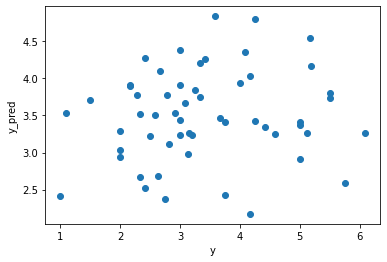

harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_1_84subs_harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.pkl


## harvardoxford-cortical_prob_Cingulate Gyrus, anterior division

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_1_84subs_harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.pkl
removed 1 outlying predictions or values


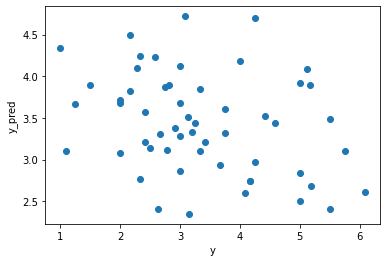

negative affect_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_1_84subs_negative affect_association-test_z_FDR_0.pkl


## negative affect_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_1_84subs_negative affect_association-test_z_FDR_0.pkl


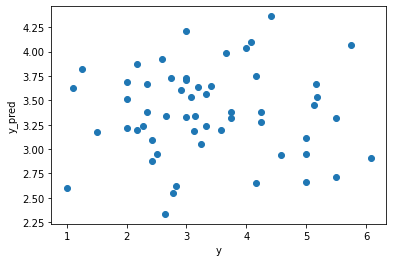

emotion regulation_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_1_84subs_emotion regulation_association-test_z_FDR_0.pkl


## emotion regulation_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_1_84subs_emotion regulation_association-test_z_FDR_0.pkl


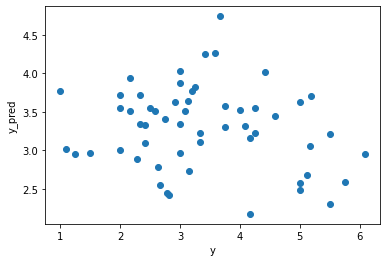

harvardoxford-cortical_prob_Frontal Medial Cortex.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_1_84subs_harvardoxford-cortical_prob_Frontal Medial Cortex.pkl


## harvardoxford-cortical_prob_Frontal Medial Cortex

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_1_84subs_harvardoxford-cortical_prob_Frontal Medial Cortex.pkl


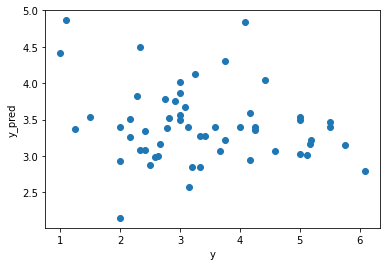

negative emotions_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_1_84subs_negative emotions_association-test_z_FDR_0.pkl


## negative emotions_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_1_84subs_negative emotions_association-test_z_FDR_0.pkl
removed 1 outlying predictions or values


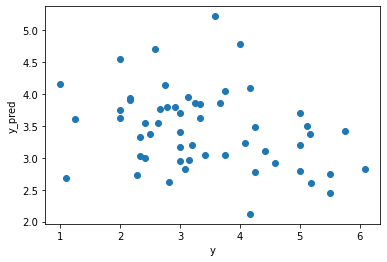

self referential_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_1_84subs_self referential_association-test_z_FDR_0.pkl


## self referential_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_1_84subs_self referential_association-test_z_FDR_0.pkl


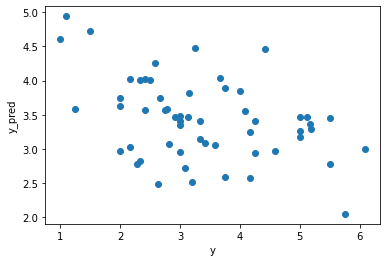

harvardoxford-cortical_prob_Frontal Orbital Cortex.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_1_84subs_harvardoxford-cortical_prob_Frontal Orbital Cortex.pkl


## harvardoxford-cortical_prob_Frontal Orbital Cortex

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_1_84subs_harvardoxford-cortical_prob_Frontal Orbital Cortex.pkl
removed 2 outlying predictions or values


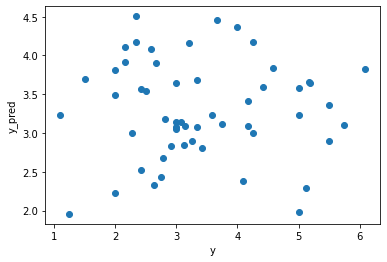

harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_1_84subs_harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.pkl


## harvardoxford-cortical_prob_Cingulate Gyrus, anterior division

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_1_84subs_harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.pkl
removed 1 outlying predictions or values


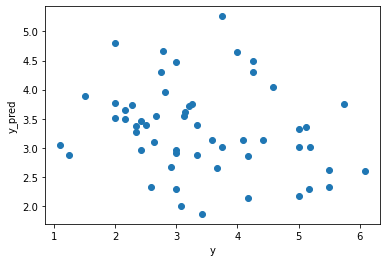

negative affect_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_1_84subs_negative affect_association-test_z_FDR_0.pkl


## negative affect_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_1_84subs_negative affect_association-test_z_FDR_0.pkl
removed 1 outlying predictions or values


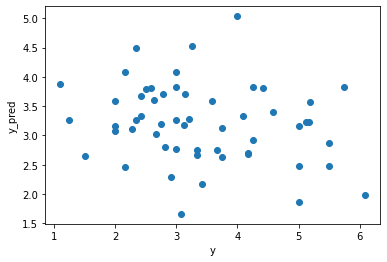

emotion regulation_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_1_84subs_emotion regulation_association-test_z_FDR_0.pkl


## emotion regulation_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_1_84subs_emotion regulation_association-test_z_FDR_0.pkl
removed 4 outlying predictions or values


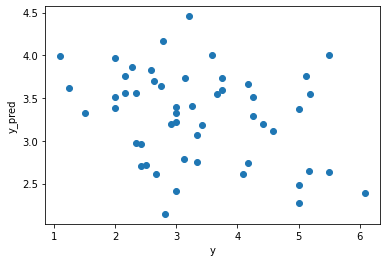

harvardoxford-cortical_prob_Frontal Medial Cortex.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_1_84subs_harvardoxford-cortical_prob_Frontal Medial Cortex.pkl


## harvardoxford-cortical_prob_Frontal Medial Cortex

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_1_84subs_harvardoxford-cortical_prob_Frontal Medial Cortex.pkl
removed 2 outlying predictions or values


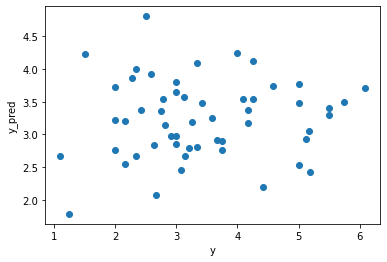

negative emotions_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_1_84subs_negative emotions_association-test_z_FDR_0.pkl


## negative emotions_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_1_84subs_negative emotions_association-test_z_FDR_0.pkl
removed 1 outlying predictions or values


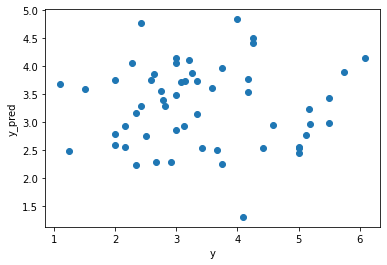

self referential_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_1_84subs_self referential_association-test_z_FDR_0.pkl


## self referential_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_1_84subs_self referential_association-test_z_FDR_0.pkl
removed 1 outlying predictions or values


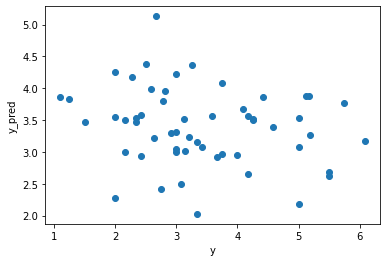

harvardoxford-cortical_prob_Frontal Orbital Cortex.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_1_84subs_harvardoxford-cortical_prob_Frontal Orbital Cortex.pkl


## harvardoxford-cortical_prob_Frontal Orbital Cortex

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_1_84subs_harvardoxford-cortical_prob_Frontal Orbital Cortex.pkl
removed 1 outlying predictions or values


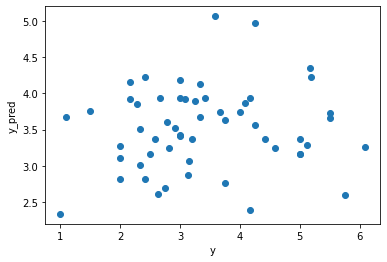

harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_1_84subs_harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.pkl


## harvardoxford-cortical_prob_Cingulate Gyrus, anterior division

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_1_84subs_harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.pkl
removed 1 outlying predictions or values


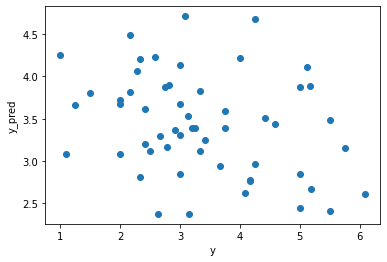

negative affect_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_1_84subs_negative affect_association-test_z_FDR_0.pkl


## negative affect_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_1_84subs_negative affect_association-test_z_FDR_0.pkl


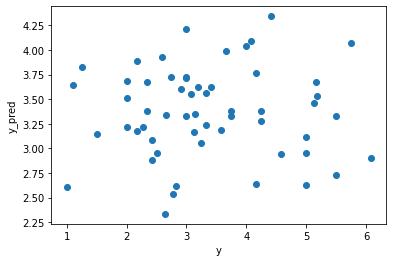

emotion regulation_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_1_84subs_emotion regulation_association-test_z_FDR_0.pkl


## emotion regulation_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_1_84subs_emotion regulation_association-test_z_FDR_0.pkl


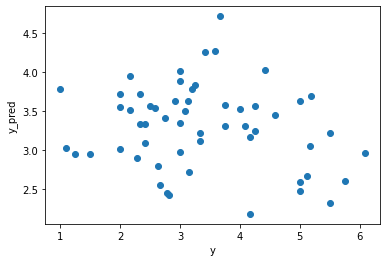

harvardoxford-cortical_prob_Frontal Medial Cortex.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_1_84subs_harvardoxford-cortical_prob_Frontal Medial Cortex.pkl


## harvardoxford-cortical_prob_Frontal Medial Cortex

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_1_84subs_harvardoxford-cortical_prob_Frontal Medial Cortex.pkl


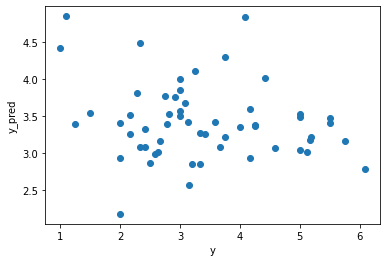

negative emotions_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_1_84subs_negative emotions_association-test_z_FDR_0.pkl


## negative emotions_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_1_84subs_negative emotions_association-test_z_FDR_0.pkl
removed 1 outlying predictions or values


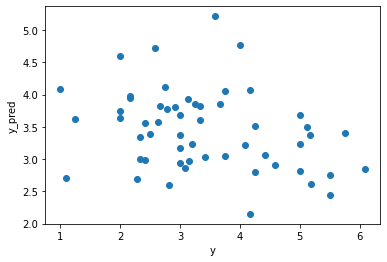

self referential_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_1_84subs_self referential_association-test_z_FDR_0.pkl


## self referential_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_1_84subs_self referential_association-test_z_FDR_0.pkl


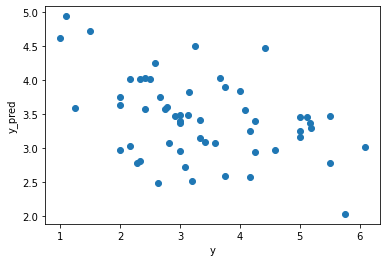

harvardoxford-cortical_prob_Frontal Orbital Cortex.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_2_84subs_harvardoxford-cortical_prob_Frontal Orbital Cortex.pkl


## harvardoxford-cortical_prob_Frontal Orbital Cortex

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_2_84subs_harvardoxford-cortical_prob_Frontal Orbital Cortex.pkl


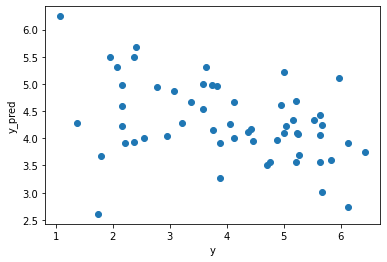

harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_2_84subs_harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.pkl


## harvardoxford-cortical_prob_Cingulate Gyrus, anterior division

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_2_84subs_harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.pkl


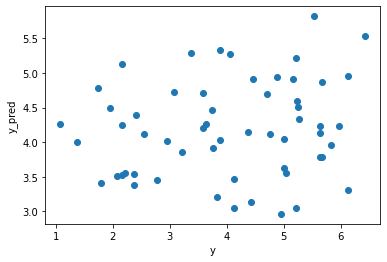

negative affect_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_2_84subs_negative affect_association-test_z_FDR_0.pkl


## negative affect_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_2_84subs_negative affect_association-test_z_FDR_0.pkl


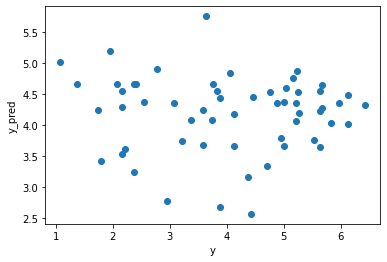

emotion regulation_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_2_84subs_emotion regulation_association-test_z_FDR_0.pkl


## emotion regulation_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_2_84subs_emotion regulation_association-test_z_FDR_0.pkl
removed 1 outlying predictions or values


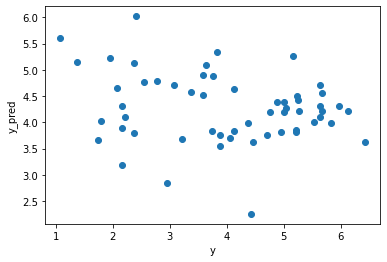

harvardoxford-cortical_prob_Frontal Medial Cortex.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_2_84subs_harvardoxford-cortical_prob_Frontal Medial Cortex.pkl


## harvardoxford-cortical_prob_Frontal Medial Cortex

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_2_84subs_harvardoxford-cortical_prob_Frontal Medial Cortex.pkl


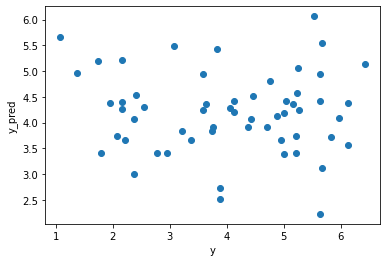

negative emotions_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_2_84subs_negative emotions_association-test_z_FDR_0.pkl


## negative emotions_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_2_84subs_negative emotions_association-test_z_FDR_0.pkl


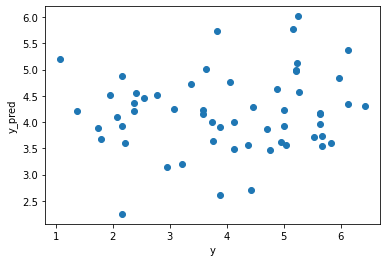

self referential_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_2_84subs_self referential_association-test_z_FDR_0.pkl


## self referential_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_2_84subs_self referential_association-test_z_FDR_0.pkl
removed 1 outlying predictions or values


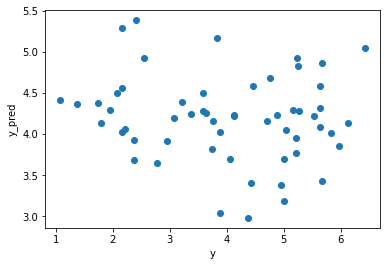

harvardoxford-cortical_prob_Frontal Orbital Cortex.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_2_84subs_harvardoxford-cortical_prob_Frontal Orbital Cortex.pkl


## harvardoxford-cortical_prob_Frontal Orbital Cortex

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_2_84subs_harvardoxford-cortical_prob_Frontal Orbital Cortex.pkl
removed 2 outlying predictions or values


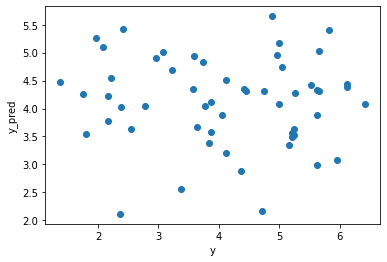

harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_2_84subs_harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.pkl


## harvardoxford-cortical_prob_Cingulate Gyrus, anterior division

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_2_84subs_harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.pkl


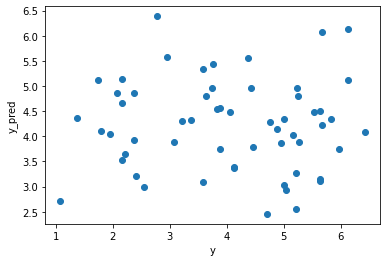

negative affect_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_2_84subs_negative affect_association-test_z_FDR_0.pkl


## negative affect_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_2_84subs_negative affect_association-test_z_FDR_0.pkl
removed 1 outlying predictions or values


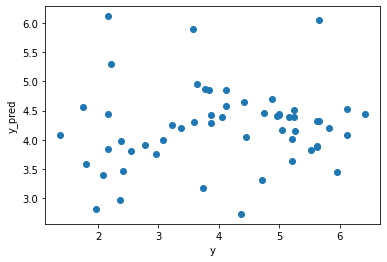

emotion regulation_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_2_84subs_emotion regulation_association-test_z_FDR_0.pkl


## emotion regulation_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_2_84subs_emotion regulation_association-test_z_FDR_0.pkl
removed 1 outlying predictions or values


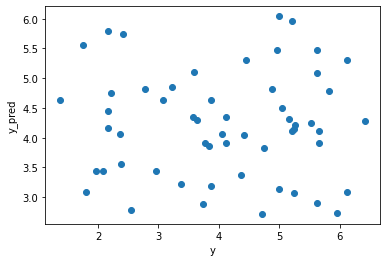

harvardoxford-cortical_prob_Frontal Medial Cortex.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_2_84subs_harvardoxford-cortical_prob_Frontal Medial Cortex.pkl


## harvardoxford-cortical_prob_Frontal Medial Cortex

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_2_84subs_harvardoxford-cortical_prob_Frontal Medial Cortex.pkl
removed 2 outlying predictions or values


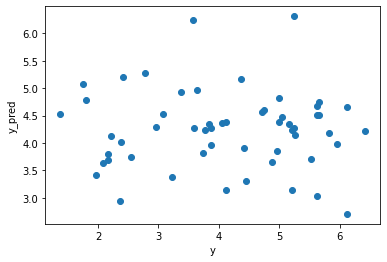

negative emotions_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_2_84subs_negative emotions_association-test_z_FDR_0.pkl


## negative emotions_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_2_84subs_negative emotions_association-test_z_FDR_0.pkl


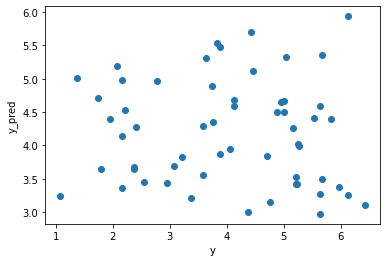

self referential_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_2_84subs_self referential_association-test_z_FDR_0.pkl


## self referential_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_2_84subs_self referential_association-test_z_FDR_0.pkl
removed 1 outlying predictions or values


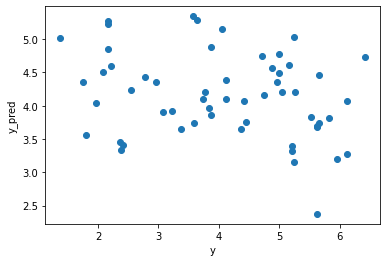

harvardoxford-cortical_prob_Frontal Orbital Cortex.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_2_84subs_harvardoxford-cortical_prob_Frontal Orbital Cortex.pkl


## harvardoxford-cortical_prob_Frontal Orbital Cortex

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_2_84subs_harvardoxford-cortical_prob_Frontal Orbital Cortex.pkl


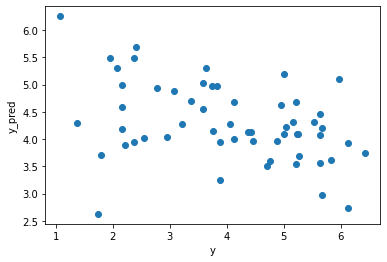

harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_2_84subs_harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.pkl


## harvardoxford-cortical_prob_Cingulate Gyrus, anterior division

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_2_84subs_harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.pkl


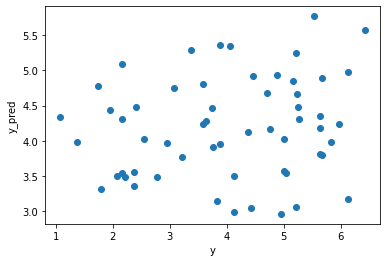

negative affect_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_2_84subs_negative affect_association-test_z_FDR_0.pkl


## negative affect_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_2_84subs_negative affect_association-test_z_FDR_0.pkl


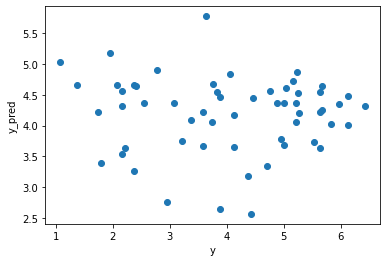

emotion regulation_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_2_84subs_emotion regulation_association-test_z_FDR_0.pkl


## emotion regulation_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_2_84subs_emotion regulation_association-test_z_FDR_0.pkl
removed 1 outlying predictions or values


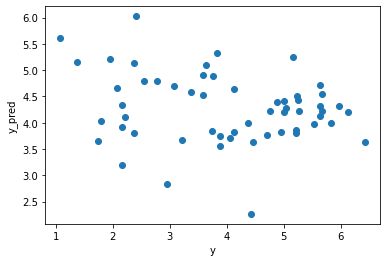

harvardoxford-cortical_prob_Frontal Medial Cortex.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_2_84subs_harvardoxford-cortical_prob_Frontal Medial Cortex.pkl


## harvardoxford-cortical_prob_Frontal Medial Cortex

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_2_84subs_harvardoxford-cortical_prob_Frontal Medial Cortex.pkl


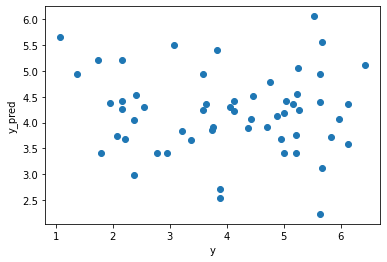

negative emotions_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_2_84subs_negative emotions_association-test_z_FDR_0.pkl


## negative emotions_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_2_84subs_negative emotions_association-test_z_FDR_0.pkl


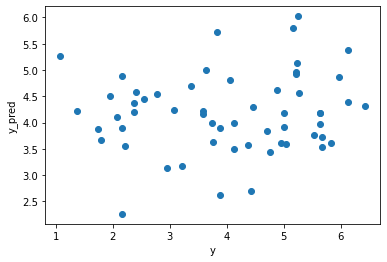

self referential_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_2_84subs_self referential_association-test_z_FDR_0.pkl


## self referential_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_factor_2_84subs_self referential_association-test_z_FDR_0.pkl
removed 1 outlying predictions or values


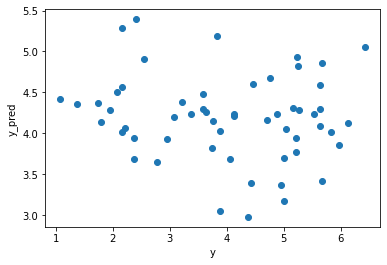

harvardoxford-cortical_prob_Frontal Orbital Cortex.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_harvardoxford-cortical_prob_Frontal Orbital Cortex.pkl


## harvardoxford-cortical_prob_Frontal Orbital Cortex

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_harvardoxford-cortical_prob_Frontal Orbital Cortex.pkl
removed 2 outlying predictions or values


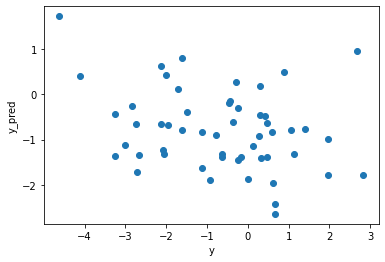

harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.pkl


## harvardoxford-cortical_prob_Cingulate Gyrus, anterior division

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.pkl


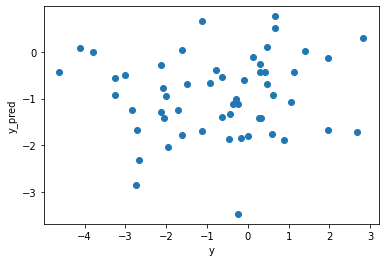

negative affect_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_negative affect_association-test_z_FDR_0.pkl


## negative affect_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_negative affect_association-test_z_FDR_0.pkl


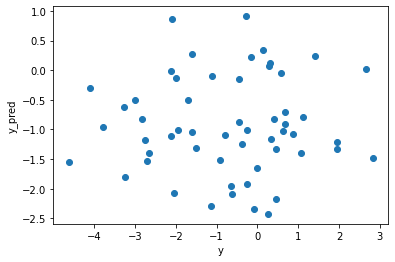

emotion regulation_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_emotion regulation_association-test_z_FDR_0.pkl


## emotion regulation_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_emotion regulation_association-test_z_FDR_0.pkl
removed 1 outlying predictions or values


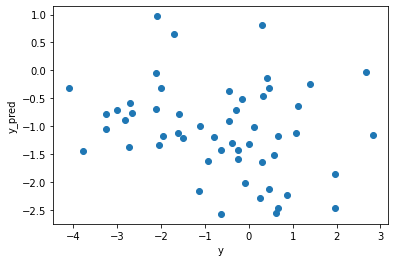

harvardoxford-cortical_prob_Frontal Medial Cortex.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_harvardoxford-cortical_prob_Frontal Medial Cortex.pkl


## harvardoxford-cortical_prob_Frontal Medial Cortex

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_harvardoxford-cortical_prob_Frontal Medial Cortex.pkl


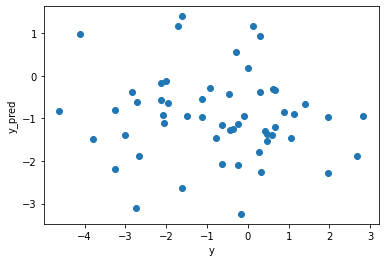

negative emotions_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_negative emotions_association-test_z_FDR_0.pkl


## negative emotions_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_negative emotions_association-test_z_FDR_0.pkl
removed 1 outlying predictions or values


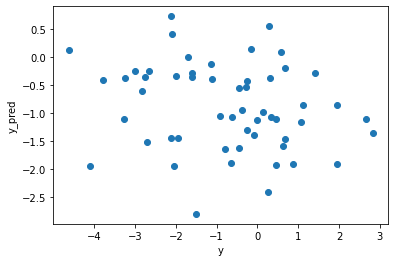

self referential_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_self referential_association-test_z_FDR_0.pkl


## self referential_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_self referential_association-test_z_FDR_0.pkl
removed 1 outlying predictions or values


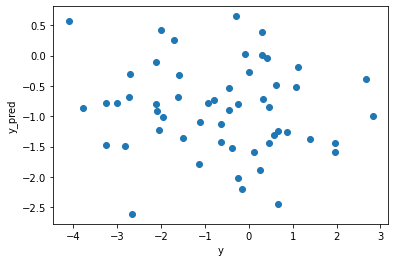

harvardoxford-cortical_prob_Frontal Orbital Cortex.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_harvardoxford-cortical_prob_Frontal Orbital Cortex.pkl


## harvardoxford-cortical_prob_Frontal Orbital Cortex

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_harvardoxford-cortical_prob_Frontal Orbital Cortex.pkl


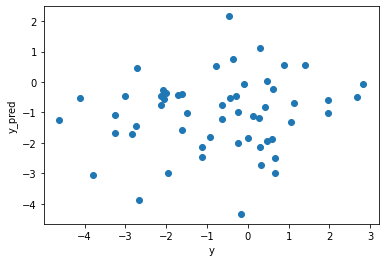

harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.pkl


## harvardoxford-cortical_prob_Cingulate Gyrus, anterior division

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.pkl


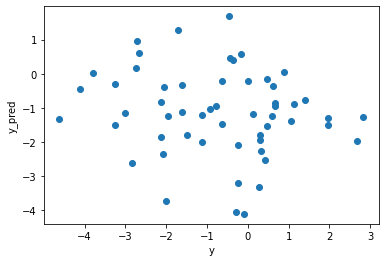

negative affect_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_negative affect_association-test_z_FDR_0.pkl


## negative affect_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_negative affect_association-test_z_FDR_0.pkl


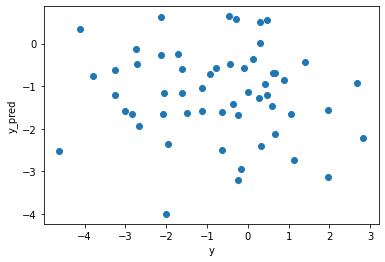

emotion regulation_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_emotion regulation_association-test_z_FDR_0.pkl


## emotion regulation_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_emotion regulation_association-test_z_FDR_0.pkl
removed 1 outlying predictions or values


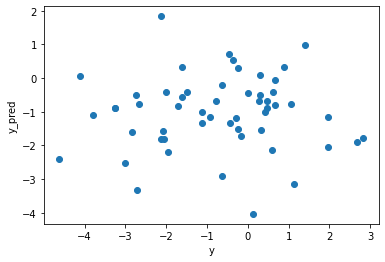

harvardoxford-cortical_prob_Frontal Medial Cortex.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_harvardoxford-cortical_prob_Frontal Medial Cortex.pkl


## harvardoxford-cortical_prob_Frontal Medial Cortex

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_harvardoxford-cortical_prob_Frontal Medial Cortex.pkl
removed 3 outlying predictions or values


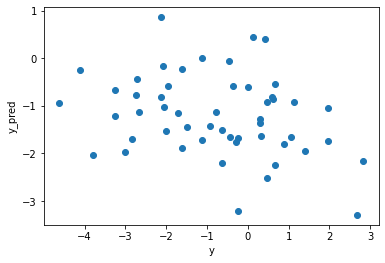

negative emotions_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_negative emotions_association-test_z_FDR_0.pkl


## negative emotions_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_negative emotions_association-test_z_FDR_0.pkl
removed 1 outlying predictions or values


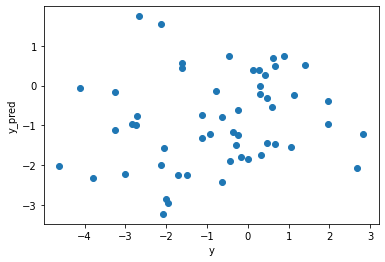

self referential_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_self referential_association-test_z_FDR_0.pkl


## self referential_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_self referential_association-test_z_FDR_0.pkl


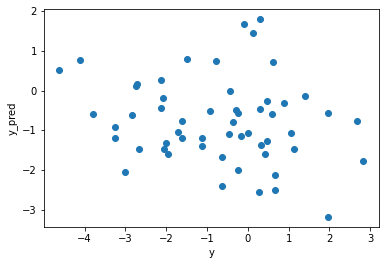

harvardoxford-cortical_prob_Frontal Orbital Cortex.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_harvardoxford-cortical_prob_Frontal Orbital Cortex.pkl


## harvardoxford-cortical_prob_Frontal Orbital Cortex

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_harvardoxford-cortical_prob_Frontal Orbital Cortex.pkl
removed 2 outlying predictions or values


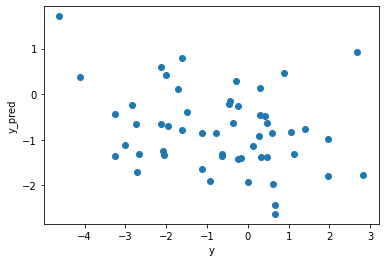

harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.pkl


## harvardoxford-cortical_prob_Cingulate Gyrus, anterior division

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.pkl
removed 1 outlying predictions or values


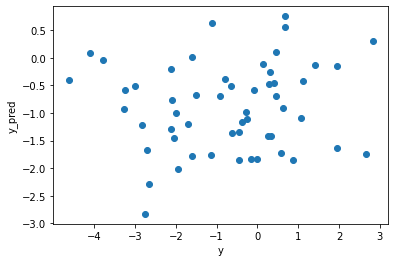

negative affect_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_negative affect_association-test_z_FDR_0.pkl


## negative affect_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_negative affect_association-test_z_FDR_0.pkl


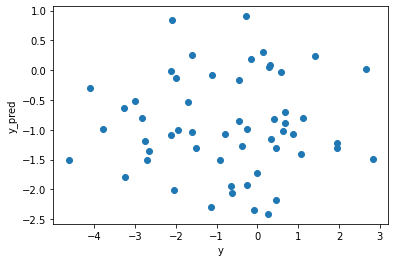

emotion regulation_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_emotion regulation_association-test_z_FDR_0.pkl


## emotion regulation_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_emotion regulation_association-test_z_FDR_0.pkl
removed 1 outlying predictions or values


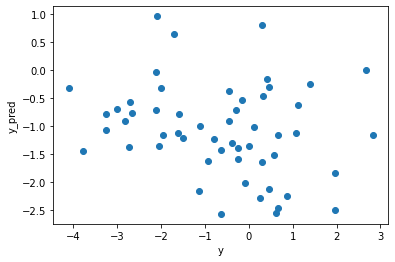

harvardoxford-cortical_prob_Frontal Medial Cortex.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_harvardoxford-cortical_prob_Frontal Medial Cortex.pkl


## harvardoxford-cortical_prob_Frontal Medial Cortex

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_harvardoxford-cortical_prob_Frontal Medial Cortex.pkl


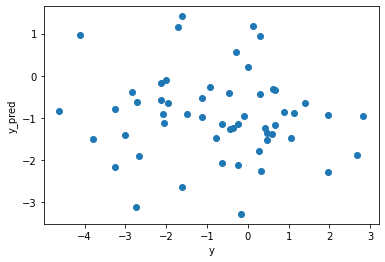

negative emotions_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_negative emotions_association-test_z_FDR_0.pkl


## negative emotions_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_negative emotions_association-test_z_FDR_0.pkl
removed 1 outlying predictions or values


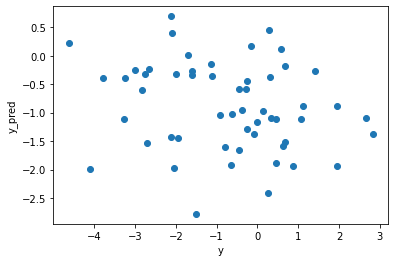

self referential_association-test_z_FDR_0.01.nii.gz
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_self referential_association-test_z_FDR_0.pkl


## self referential_association-test_z_FDR_0

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscore_RTFS_f1_minus_f2_84subs_self referential_association-test_z_FDR_0.pkl
removed 1 outlying predictions or values


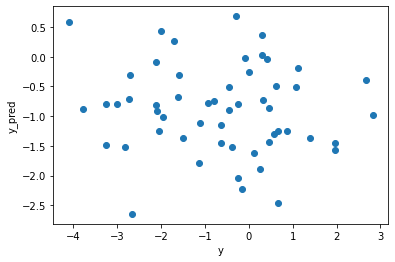

In [20]:

for self_report_regression_var in ['RTFS_factor_1', 'RTFS_factor_2', 'RTFS_f1_minus_f2']:
    regression_output_folderpath = ml_data_folderpath + "/SST/regress_sr_" + self_report_regression_var
    if os.path.exists(regression_output_folderpath)==False:
        os.mkdir(regression_output_folderpath)
    for source_dataset_name in [
        'post_stop_cg_spatially_concatenated',
        'post_failed_stop_cg_w_supplementary',
        'post_correct_stop_cg_w_supplementary'
    ]:
        source_output_folderpath = regression_output_folderpath + "/" + source_dataset_name
        if os.path.exists(source_output_folderpath)==False:
            os.mkdir(source_output_folderpath)
        for mlr_i, mlr in mask_list.iterrows():
            print(mlr['filename'])
            results_filepath=(
                source_output_folderpath + 
                "/regress_sr_no_zscore_" + self_report_regression_var + "_84subs_" + 
                mlr['name'] + ".pkl"
            )
            print(results_filepath)
            do_complete_sr_regression_analysis_for_mask(
                mask_filepath = mlr['filepath'],
                mask_threshold = mlr['threshold'],
                results_filepath = results_filepath,
                apply_loocv_and_save_kwargs = 
                {'response_transform_func':sr_regressor_trans_func,
                    'decoderConstructor' : decoderConstructor,
                    
                    'brain_data_filepath' : ml_data_folderpath + '/SST/Brain_Data_posterror_conditions_84subs_' + source_dataset_name + '.pkl',
                    'train_test_markers_filepath' : train_test_markers_filepath
                    }
            )
            

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_stop_cg_spatially_concatenated/regress_sr_no_zscoreRTFS_factor_1_84subs_wholebrain.pkl
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_stop_cg_spatially_concatenated/regress_sr_no_zscoreRTFS_factor_1_84subs_wholebrain.pkl


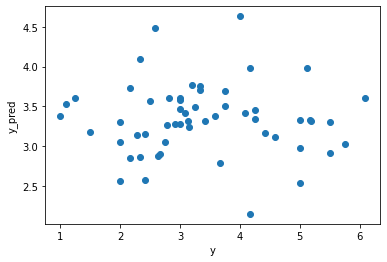

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_failed_stop_cg_w_supplementary/regress_sr_no_zscoreRTFS_factor_1_84subs_wholebrain.pkl
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_failed_stop_cg_w_supplementary/regress_sr_no_zscoreRTFS_factor_1_84subs_wholebrain.pkl
removed 1 outlying predictions or values


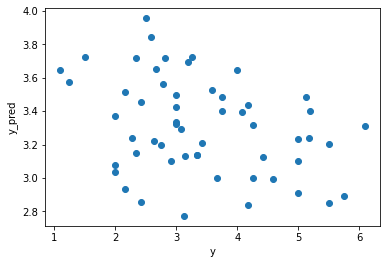

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_correct_stop_cg_w_supplementary/regress_sr_no_zscoreRTFS_factor_1_84subs_wholebrain.pkl
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_correct_stop_cg_w_supplementary/regress_sr_no_zscoreRTFS_factor_1_84subs_wholebrain.pkl
removed 3 outlying predictions or values


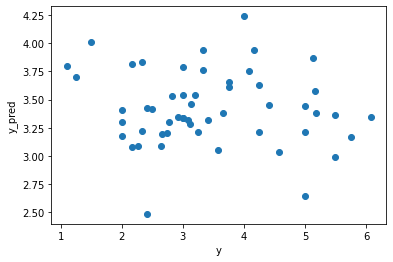

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_stop_cg_spatially_concatenated/regress_sr_no_zscoreRTFS_factor_2_84subs_wholebrain.pkl
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_stop_cg_spatially_concatenated/regress_sr_no_zscoreRTFS_factor_2_84subs_wholebrain.pkl
removed 1 outlying predictions or values


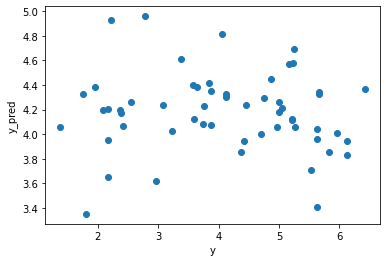

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscoreRTFS_factor_2_84subs_wholebrain.pkl
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscoreRTFS_factor_2_84subs_wholebrain.pkl
removed 3 outlying predictions or values


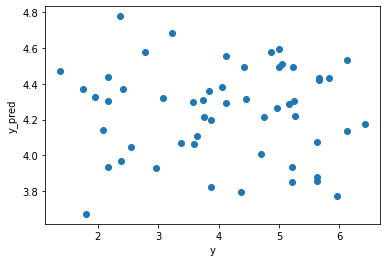

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscoreRTFS_factor_2_84subs_wholebrain.pkl
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscoreRTFS_factor_2_84subs_wholebrain.pkl


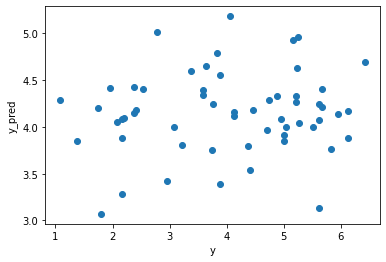

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_stop_cg_spatially_concatenated/regress_sr_no_zscoreRTFS_f1_minus_f2_84subs_wholebrain.pkl
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_stop_cg_spatially_concatenated/regress_sr_no_zscoreRTFS_f1_minus_f2_84subs_wholebrain.pkl
removed 2 outlying predictions or values


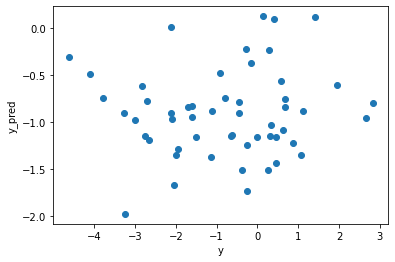

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscoreRTFS_f1_minus_f2_84subs_wholebrain.pkl
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_failed_stop_cg_w_supplementary/regress_sr_no_zscoreRTFS_f1_minus_f2_84subs_wholebrain.pkl
removed 3 outlying predictions or values


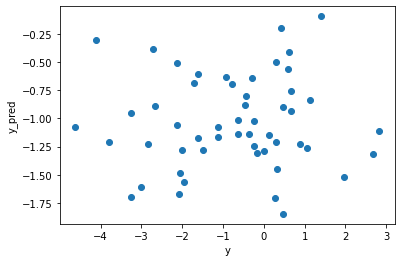

/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscoreRTFS_f1_minus_f2_84subs_wholebrain.pkl
/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_f1_minus_f2/post_correct_stop_cg_w_supplementary/regress_sr_no_zscoreRTFS_f1_minus_f2_84subs_wholebrain.pkl
removed 1 outlying predictions or values


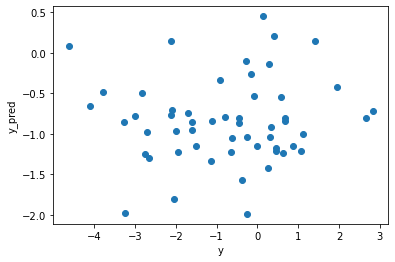

In [25]:

for self_report_regression_var in ['RTFS_factor_1', 'RTFS_factor_2', 'RTFS_f1_minus_f2']:
    regression_output_folderpath = ml_data_folderpath + "/SST/regress_sr_" + self_report_regression_var
    if os.path.exists(regression_output_folderpath)==False:
        os.mkdir(regression_output_folderpath)
    for source_dataset_name in [
        'post_stop_cg_spatially_concatenated',
        'post_failed_stop_cg_w_supplementary',
        'post_correct_stop_cg_w_supplementary'
    ]:
        source_output_folderpath = regression_output_folderpath + "/" + source_dataset_name
        if os.path.exists(source_output_folderpath)==False:
            os.mkdir(source_output_folderpath)
#         for mlr_i, mlr in mask_list.iterrows():
#             print(mlr['filename'])
        results_filepath=(
            source_output_folderpath + 
            "/regress_sr_no_zscore" + self_report_regression_var + "_84subs_" + 
        "wholebrain" + ".pkl"
        )
        print(results_filepath)
        do_complete_sr_regression_analysis_for_mask(
#             mask_filepath = mlr['filepath'],
#             mask_threshold = mlr['threshold'],
                results_filepath = results_filepath,
                apply_loocv_and_save_kwargs = 
                {'response_transform_func':sr_regressor_trans_func,
                    'decoderConstructor' : decoderConstructor,
                    
                    'brain_data_filepath' : ml_data_folderpath + '/SST/Brain_Data_posterror_conditions_84subs_' + source_dataset_name + '.pkl',
                    'train_test_markers_filepath' : train_test_markers_filepath
                    }
        )


In [26]:
def visualize_series_corr(series1,series2):
    display(HTML(series1.name + " vs " + series2.name))
    pearson_result = pearsonr(series1,series2)
    display(HTML("r=" + format(pearson_result[0],".2f") +"; p-value=" + format(pearson_result[1],".4f")))
    spearman_result = spearmanr(series1,series2)
    display(HTML("rho=" + format(spearman_result[0],".2f") +"; p-value=" + format(spearman_result[1],".4f")))
    cplot = pyplot.scatter(series1,series2)
    cplot.axes.set_xlabel(series1.name)
    cplot.axes.set_ylabel(series2.name)
    pyplot.show()

In [27]:
from matplotlib import pyplot as plt

## generate commands to run the batch version of the above

In [24]:


for self_report_regression_var in ['RTFS_factor_1', 'RTFS_factor_2', 'RTFS_f1_minus_f2']:
    regression_output_folderpath = ml_data_folderpath + "/SST/regress_sr_" + self_report_regression_var
    if os.path.exists(regression_output_folderpath)==False:
        os.mkdir(regression_output_folderpath)
    for source_dataset_name in [
        'post_stop_cg_spatially_concatenated',
        'post_failed_stop_cg_w_supplementary',
        'post_correct_stop_cg_w_supplementary'
    ]:
        source_output_folderpath = regression_output_folderpath + "/" + source_dataset_name
        if os.path.exists(source_output_folderpath)==False:
            os.mkdir(source_output_folderpath)
        for mlr_i, mlr in mask_list.iterrows():
            #print(mlr['filename'])
            results_filepath=(
                source_output_folderpath + 
                "/regress_sr_no_zscore_" + self_report_regression_var + "_84subs_" + 
                mlr['name'] + ".pkl"
            )
            print("sbatch run_sr_learning_script.sbatch ml-ns_on_self_report_batch.py" + 
                  " -m \"" + mlr['filepath'] + "\"" + 
                  " -t " + str(mlr['threshold']) + 
                  " -r " + self_report_regression_var + 
                  " -s " + '/SST/Brain_Data_posterror_conditions_84subs_' + source_dataset_name + '.pkl' +
                  " -o \"" + results_filepath + "\"")
            
            print("")
        
#             do_complete_sr_regression_analysis_for_mask(
#                 self_report_regression_var = self_report_regression_var,
#                 mask_filepath = mlr['filepath'],
#                 mask_threshold = mlr['threshold'],
#                 results_filepath = results_filepath,
#                 source_dataset_relpath = '/SST/Brain_Data_conditions_84subs_' + source_dataset_name + '_w_supplementary.pkl'
#             )
         

sbatch run_sr_learning_script.sbatch ml-ns_on_self_report_batch.py -m "/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/masks/failure_related/harvardoxford/harvardoxford-cortical_prob_Frontal Orbital Cortex.nii.gz" -t 30 -r RTFS_factor_1 -s /SST/Brain_Data_posterror_conditions_84subs_post_stop_cg_spatially_concatenated.pkl -o "/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_stop_cg_spatially_concatenated/regress_sr_no_zscore_RTFS_factor_1_84subs_harvardoxford-cortical_prob_Frontal Orbital Cortex.pkl"

sbatch run_sr_learning_script.sbatch ml-ns_on_self_report_batch.py -m "/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/masks/failure_related/harvardoxford/harvardoxford-cortical_prob_Cingulate Gyrus, anterior division.nii.gz" -t 30 -r RTFS_factor_1 -s /SST/Brain_Data_posterror_conditions_84subs_post_stop_cg_spatially_concatenated.pkl -o "/gpfs/projects/sanlab/shared/DEV/nonbids_data/fMRI/ml/SST/regress_sr_RTFS_factor_1/post_stop_cg_spatia

## Using the concatenated image version

So I wrote some code to concatenate two different images. This will allow us to train a learner that reads off both CorrectGo and CorrectStop, _separately_, and then pick the best voxels across the group for prediction.

Let's create new input files at the previous step, at `load_multisubject_brain_data_ssw_w1-conditions.ipynb`. Then we can just input the revised data and run it as its own file.